<a href="https://colab.research.google.com/github/Ishan2506/InternShipTask/blob/main/SaiKetSyatemTasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1: Data Cleaning and Preprocessing**

In [201]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [202]:
#Read the dataset
df=pd.read_csv('/content/Telco_Customer_Churn_Dataset .csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [203]:
#Describe to the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [204]:
#Check the missing value is present or not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**HANDLE MISSING VALUE:-**

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [206]:
#Convert TotalCharge datatype Object into Numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

#Then Recheck the missing value present or not
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [207]:
#Missing Value found
#Let's Handle It

df.fillna(0,inplace=True)
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [208]:
#Droping unnecessary Column
df.drop('customerID',inplace=True, axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Convert categorical variables into numerical representations techniques with the help of 'One-Hot Encoding'.**

In [209]:
# Differentiate Categorial Data and Numerical Data
numList = list(df.select_dtypes(include=['int64','float64']).keys())

catList = list(df.select_dtypes(include=['O']).keys())

print(catList)
print(numList)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [210]:

#One Hot Encoding
encodedData=pd.get_dummies(df, columns=catList)
print(encodedData.head(5))

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85           True   
1              0      34           56.95       1889.50          False   
2              0       2           53.85        108.15          False   
3              0      45           42.30       1840.75          False   
4              0       2           70.70        151.65           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0              False  

# **TASK 2: Exploratory Data Analysis (EDA)**

 Description:

    Calculate and visualize the overall churn rate.
    Explore customer distribution by various
    demographics.
    Analyze tenure distribution.
    Investigate relationships between churn and
    different contract types/payment methods.

****Calculate and visualize the overall churn rate.****

In [211]:
totalCust = len(df)
ChurnYes = len(df[df['Churn']=='Yes'])
ChurnNo= len(df[df['Churn']== 'No'])

overallChurnRate = totalCust /ChurnYes * 100
print('Customer Churn rate: {}%' . format(round(overallChurnRate,2)))

Customer Churn rate: 376.83%


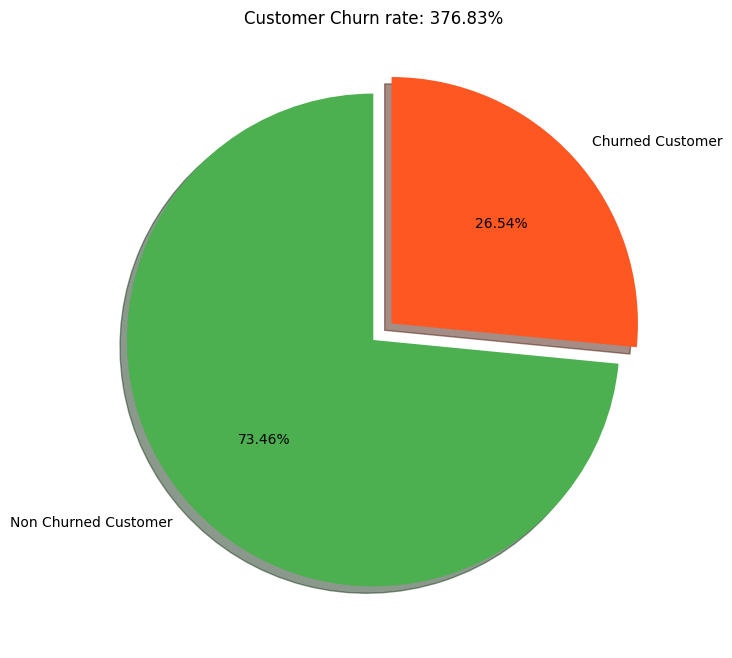

In [212]:
#PieChart
# Calculate the counts for churned and non-churned customers
ChurnCnt = df['Churn'].value_counts()

# Visualize Using Pie Chart
plt.figure(figsize=(8, 8))
explode=(0.0,0.1)
plt.pie(ChurnCnt,explode=explode, labels=['Non Churned Customer', 'Churned Customer'],shadow=True, autopct='%1.2f%%', colors=['#4CAF50', '#FF5722'], startangle=90)
plt.title('Customer Churn rate: {}%' . format(round(overallChurnRate,2)))
plt.show()

**Explore customer distribution by various demographics.**

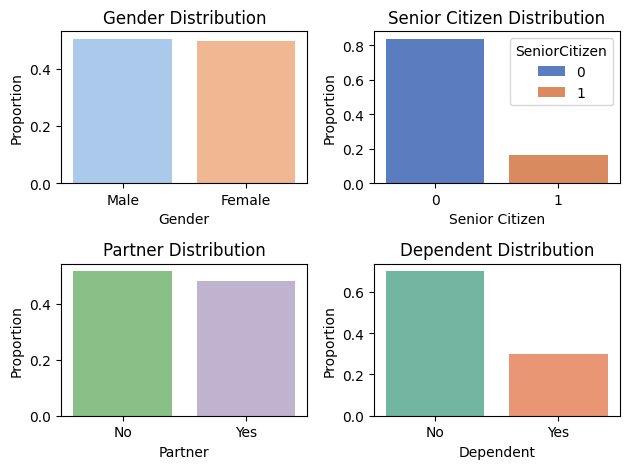

In [213]:
genDistri = df['gender'].value_counts(normalize=True)
senDistri = df['SeniorCitizen'].value_counts(normalize=True)
partnerDistri = df['Partner'].value_counts(normalize=True)
dependentDistri = df['Dependents'].value_counts(normalize=True)

plt.subplot(2,2,1)
sns.barplot(x=genDistri.index, y=genDistri.values,palette='pastel',hue=genDistri.index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')


plt.subplot(2,2,2)
sns.barplot(x=senDistri.index, y=senDistri.values,palette='muted',hue=senDistri.index)
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Proportion')

plt.subplot(2,2,3)
sns.barplot(x=partnerDistri.index, y=partnerDistri.values, palette='Accent',hue=partnerDistri.index)
plt.title('Partner Distribution')
plt.xlabel('Partner')
plt.ylabel('Proportion')

plt.subplot(2,2,4)
sns.barplot(x=dependentDistri.index, y=dependentDistri.values,hue=dependentDistri.index,palette='Set2')
plt.title('Dependent Distribution')
plt.xlabel('Dependent')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

****Analyze tenure distribution.****

In [214]:
print(df['tenure'].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


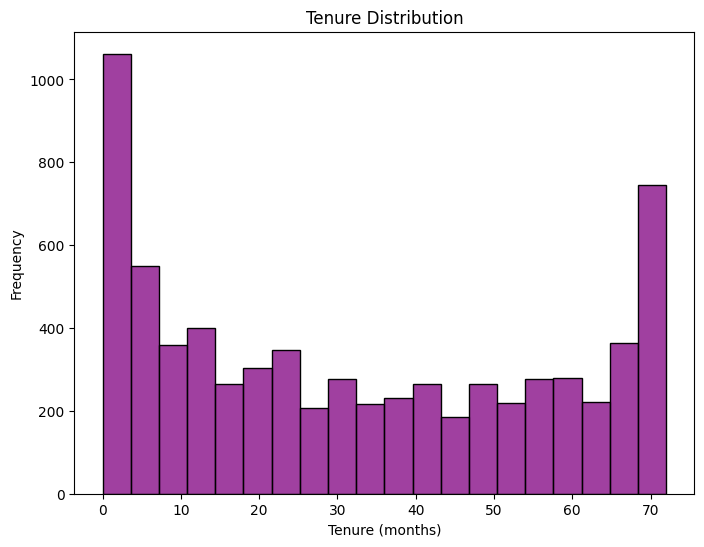

In [215]:
#Ploting Tenure Destribution
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], bins=20, color='purple')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

**Investigate relationships between churn and
 different contract types/payment methods.**

In [216]:
print(pd.crosstab(df['Churn'],df['Contract']))

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48


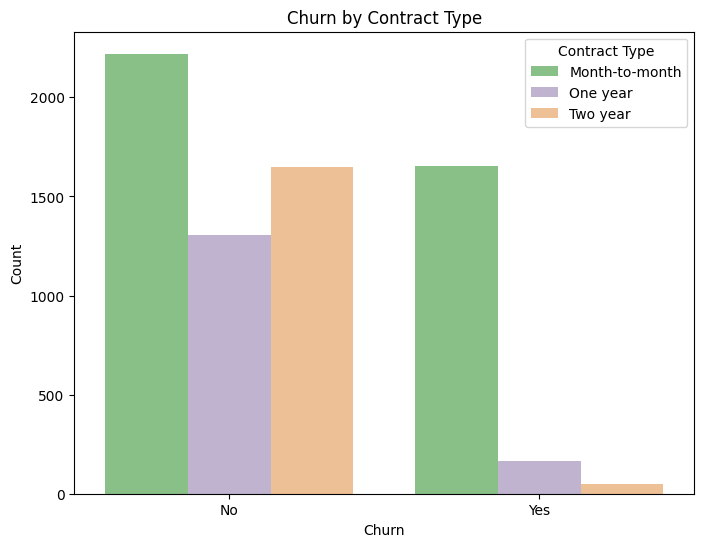

In [217]:
# Churn by contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='Contract', data=df, palette='Accent')
plt.title('Churn by Contract Type')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Contract Type', loc='upper right')
plt.show()

In [218]:
print(pd.crosstab(df['Churn'],df['PaymentMethod']))

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  


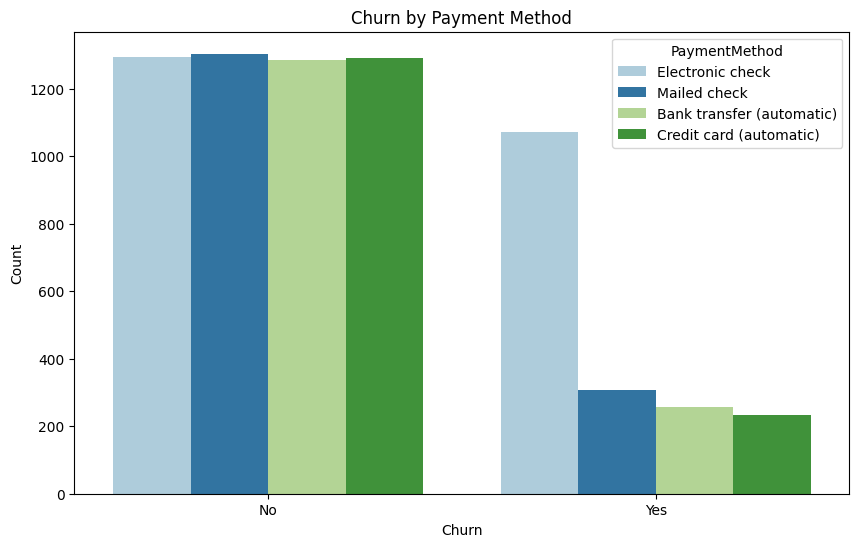

In [219]:
# Churn by payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='PaymentMethod', data=df, palette='Paired')
plt.title('Churn by Payment Method')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='PaymentMethod', loc='upper right')
plt.show()

# **TASK 3: Customer Segmentation**

**Description:**

    Segment customers based on tenure,monthly charges, and contract type.
    Analyze churn rates across these segments.

**Segment customers based on tenure,monthly charges, and contract type.**

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [256]:
# Select Numeric Columns
df1 = df[['tenure','MonthlyCharges','Contract']]

#Convert Contract Column into numeric values using OneHot Encoding
df1 = pd.get_dummies(df1,columns=['Contract'],drop_first=True)
df1.head(3)

,tenure,MonthlyCharges,Contract_1,Contract_2
0,1,29.85,False,False
1,34,56.95,True,False
2,2,53.85,False,False


In [257]:
# Convert above columns data into standard Form like 0 to 1
stScale = StandardScaler()
df1Scale = stScale.fit_transform(df1)
df1Scale

array([[-1.27744458, -1.16032292, -0.51424938, -0.56297505],
       [ 0.06632742, -0.25962894,  1.94458183, -0.56297505],
       [-1.23672422, -0.36266036, -0.51424938, -0.56297505],
       ...,
       [-0.87024095, -1.1686319 , -0.51424938, -0.56297505],
       [-1.15528349,  0.32033821, -0.51424938, -0.56297505],
       [ 1.36937906,  1.35896134, -0.51424938,  1.77627764]])

In [258]:
# We create 3 cluster for above columns using KMeans Clustering
kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(df1Scale)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup,MonthlyGroup
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,2,29.85,29.85,0,2,ShortRange,Low
1,1,0,0,0,34,1,0,0,1,0,...,0,1,0,3,56.95,1889.50,0,0,MidRange,Medium
2,1,0,0,0,2,1,0,0,1,1,...,0,0,1,3,53.85,108.15,1,2,ShortRange,Medium
3,1,0,0,0,45,0,0,0,1,0,...,0,1,0,0,42.30,1840.75,0,0,MidRange,Medium
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,ShortRange,Medium


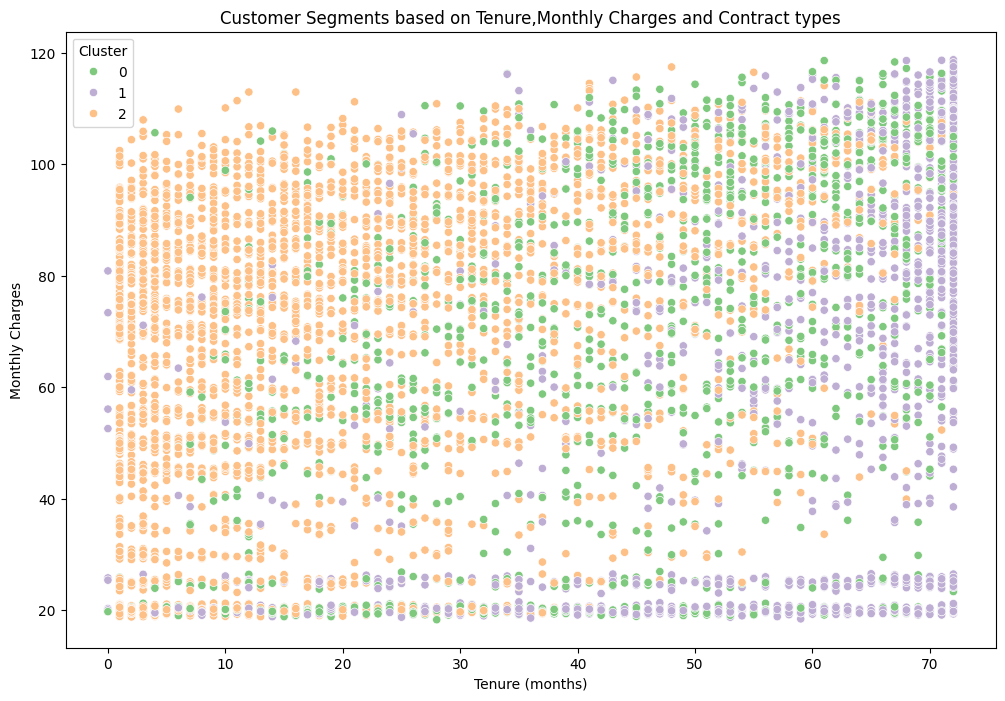

In [259]:
#Create a scatterPlot for Customer Segmentation
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=df, palette='Accent')
plt.title('Customer Segments based on Tenure,Monthly Charges and Contract types')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Cluster')
plt.show()


**Analyze churn rates across these segments.**

In [260]:
# Creating Different Groups for Tenure Segmentation
bin = [0,12,48,72]
labels = ['ShortRange','MidRange','LongRange']
df['TenureGroup'] = pd.cut(df['tenure'],bins=bin,labels=labels,include_lowest=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup,MonthlyGroup
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,2,29.85,29.85,0,2,ShortRange,Low
1,1,0,0,0,34,1,0,0,1,0,...,0,1,0,3,56.95,1889.50,0,0,MidRange,Medium
2,1,0,0,0,2,1,0,0,1,1,...,0,0,1,3,53.85,108.15,1,2,ShortRange,Medium
3,1,0,0,0,45,0,0,0,1,0,...,0,1,0,0,42.30,1840.75,0,0,MidRange,Medium
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,ShortRange,Medium


In [261]:
# Creating Different Groups for Monthly Charges Segmentation
bin = [0,40,80,120]
labels = ['Low','Medium','High']
df['MonthlyGroup'] = pd.cut(df['MonthlyCharges'],bins=bin,labels=labels,include_lowest=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup,MonthlyGroup
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,2,29.85,29.85,0,2,ShortRange,Low
1,1,0,0,0,34,1,0,0,1,0,...,0,1,0,3,56.95,1889.50,0,0,MidRange,Medium
2,1,0,0,0,2,1,0,0,1,1,...,0,0,1,3,53.85,108.15,1,2,ShortRange,Medium
3,1,0,0,0,45,0,0,0,1,0,...,0,1,0,0,42.30,1840.75,0,0,MidRange,Medium
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,ShortRange,Medium


In [262]:
# Creating a group using group of tenure,monthly charges and Contract
groups = df.groupby(['Contract','MonthlyGroup','TenureGroup'])['Churn'].value_counts(normalize=True).unstack().fillna(0)
groups.columns = ['Churn','No Churn']

#calculate churn rate
groups['ChurnRate'] = groups['Churn'] / (groups['Churn'] + groups['No Churn'])
groups.head(3)

Churn  No Churn  ChurnRate
Contract MonthlyGroup TenureGroup                               
0        Low          ShortRange   0.694757  0.305243   0.694757
                      MidRange     0.850467  0.149533   0.850467
                      LongRange    0.857143  0.142857   0.857143

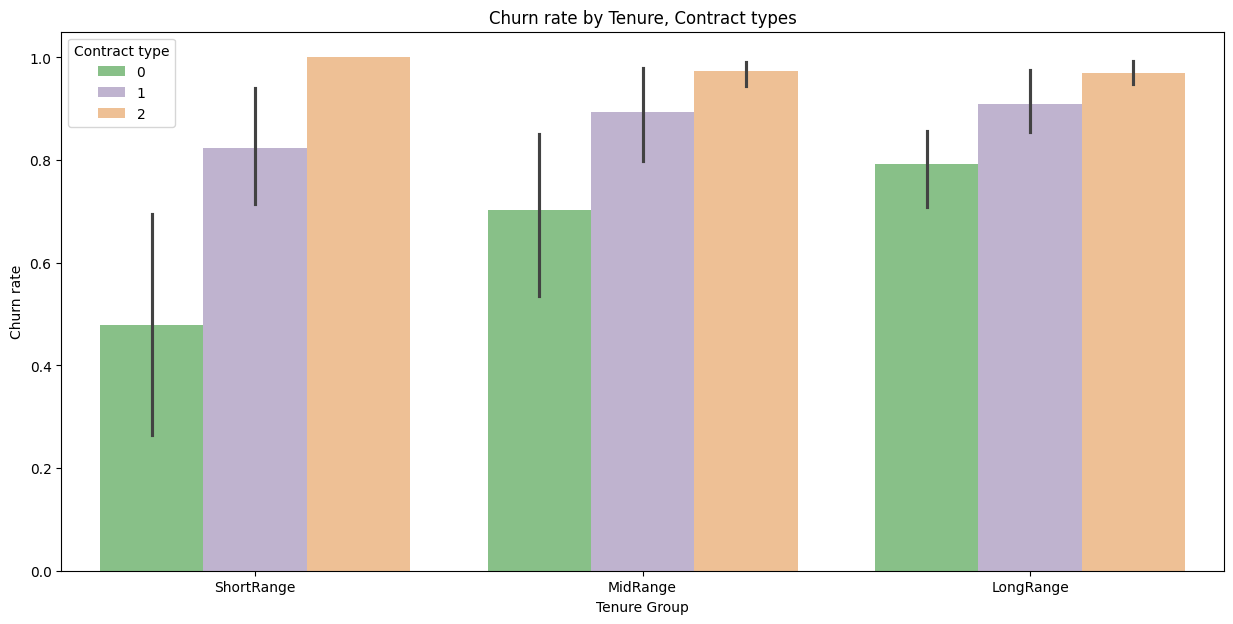

In [263]:
#plot for churn rate across tenure group for each contract rype
#reset the index for easier plotting
# groups = groups.reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='TenureGroup', y='ChurnRate',  data=groups, hue='Contract', palette='Accent')
plt.title('Churn rate by Tenure, Contract types')
plt.xlabel('Tenure Group')
plt.ylabel('Churn rate')
plt.legend(title='Contract type')
plt.show()

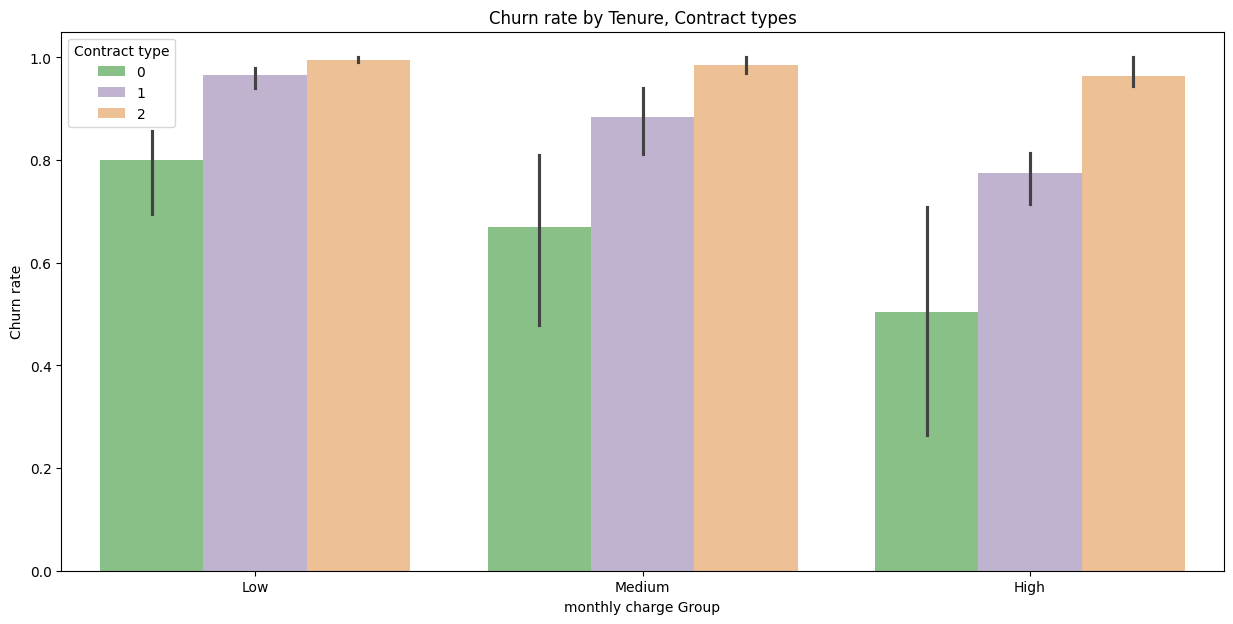

In [264]:
#plot for churn rate across monthly_charge_group for each contract rype
plt.figure(figsize=(15,7))
sns.barplot(x='MonthlyGroup', y='ChurnRate',  data=groups, hue='Contract', palette='Accent')
plt.title('Churn rate by Tenure, Contract types')
plt.xlabel('monthly charge Group')
plt.ylabel('Churn rate')
plt.legend(title='Contract type')
plt.show()

# **TASK 4: Churn Prediction Model**

 Description:

    Develop a churn prediction model using machine learning algorithms like logistic regression.
    Evaluate the model's performance using
    appropriate metrics.

In [265]:
# Converting one other category into No Category

df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup,MonthlyGroup
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,2,29.85,29.85,0,2,ShortRange,Low
1,1,0,0,0,34,1,0,0,1,0,...,0,1,0,3,56.95,1889.50,0,0,MidRange,Medium
2,1,0,0,0,2,1,0,0,1,1,...,0,0,1,3,53.85,108.15,1,2,ShortRange,Medium
3,1,0,0,0,45,0,0,0,1,0,...,0,1,0,0,42.30,1840.75,0,0,MidRange,Medium
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,ShortRange,Medium


In [266]:
# Now Converting all the categorial data into numerical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Partner']=label.fit_transform(df['Partner'])
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])
df['gender'] = label.fit_transform(df['gender'])
df['PhoneService']=label.fit_transform(df['PhoneService'])
df['MultipleLines'] = label.fit_transform(df['MultipleLines'])
df['DeviceProtection'] = label.fit_transform(df['DeviceProtection'])
df['OnlineSecurity']=label.fit_transform(df['OnlineSecurity'])
df['Dependents'] = label.fit_transform(df['Dependents'])
df['TechSupport'] = label.fit_transform(df['TechSupport'])
df['StreamingTV'] = label.fit_transform(df['StreamingTV'])
df['PaperlessBilling'] = label.fit_transform(df['PaperlessBilling'])
df['StreamingMovies'] = label.fit_transform(df['StreamingMovies'])
df['InternetService'] = label.fit_transform(df['InternetService'])
df['OnlineBackup'] = label.fit_transform(df['OnlineBackup'])

In [267]:
# Converting Churn values into Numerical Values
df['Churn']=label.fit_transform(df['Churn'])
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup,MonthlyGroup
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,2,29.85,29.85,0,2,ShortRange,Low
1,1,0,0,0,34,1,0,0,1,0,...,0,1,0,3,56.95,1889.50,0,0,MidRange,Medium
2,1,0,0,0,2,1,0,0,1,1,...,0,0,1,3,53.85,108.15,1,2,ShortRange,Medium
3,1,0,0,0,45,0,0,0,1,0,...,0,1,0,0,42.30,1840.75,0,0,MidRange,Medium
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2,ShortRange,Medium


In [268]:
# Define X for testing and training data model
x = df.drop(columns=['Churn','TenureGroup','MonthlyGroup','Cluster']).values
x

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [269]:
# Define X for Prediction
y = df[['Churn']].values
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [270]:
# Split the data into train test part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        6.92000e+01, 6.92000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        2.47000e+01, 2.47000e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        9.44500e+01, 1.51120e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        1.92000e+01, 7.76250e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        9.48000e+01, 3.56565e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        1.93500e+01, 1.52600e+02]])

**Develop a churn prediction model using machine learning algorithms like logistic regression.**

In [271]:
# Churn prediction using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [272]:
# Predict the Y using Model
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, ..., 0, 0, 0])

**Evaluate the model's performance using appropriate metrics.**

In [273]:
# Creating Different Matrixs
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report  #metrics
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[916, 110],
       [174, 209]])

In [274]:
# Printing Accuracy Score
print('Accuracy Score:-',model.score(x_test,y_test)*100)

Accuracy Score:- 79.84386089425124


In [275]:
# Printing Classification Report
classiReport = classification_report(y_test, y_pred)
print("Classification Report:",classiReport)


Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1026
           1       0.66      0.55      0.60       383

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

